# 11-Projeto-11-Transfer-learning-usando-o-mobilenet

* Neste projeto iremos usar uma rede neural pré-treinada chamada MobileNet
* Utilizaremos a base de dados Tensorflow Flowers


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile

In [2]:
import tensorflow_hub as hub

In [3]:
TRAINED_MODEL_MOBILENET_URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'

In [4]:
trained_mobilenet = tf.keras.Sequential([hub.KerasLayer(TRAINED_MODEL_MOBILENET_URL,
                                        input_shape=(224,224,3))])

In [7]:
path = 'datasets/Transfer Learning Data/watch.jpg'

#carregando a imagem
sample_img = tf.keras.preprocessing.image.load_img(path, 
                                               target_size=(224,224))

sample_img = np.array(sample_img) / 255.0

sample_img.shape

(224, 224, 3)

In [8]:
predict_class = trained_mobilenet.predict(np.expand_dims(sample_img, axis=0))

URL_IMAGENET_LABELS = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
label_path = tf.keras.utils.get_file('ImageNetLabels.txt', URL_IMAGENET_LABELS)

16384/10484 [==============================================] - 0s 1us/step


In [11]:
predict_class = np.argmax(predict_class)

In [12]:
imagenet_labels = np.array(open(label_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

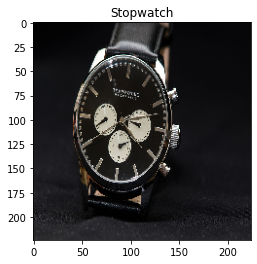

In [14]:
plt.imshow(sample_img)
predict_class_name  = imagenet_labels[predict_class]
plt.title(predict_class_name.title());

In [17]:
def predict_mobilenet(path):
    
    TRAINED_MODEL_MOBILENET_URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'
    
    sample_img = tf.keras.preprocessing.image.load_img(path, 
                                               target_size=(224,224))
    sample_img = np.array(sample_img) / 255.0
    
   
    
    trained_mobilenet = tf.keras.Sequential([hub.KerasLayer(TRAINED_MODEL_MOBILENET_URL,
                                        input_shape=(224,224,3))])
    
    predict_class = trained_mobilenet.predict(np.expand_dims(sample_img, axis=0))
    
    predict_class = trained_mobilenet.predict(np.expand_dims(sample_img, axis=0))

    URL_IMAGENET_LABELS = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
    label_path = tf.keras.utils.get_file('ImageNetLabels.txt', URL_IMAGENET_LABELS)
    
    predict_class = np.argmax(predict_class)
    
    imagenet_labels = np.array(open(label_path).read().splitlines())
    
    plt.imshow(sample_img)
    predict_class_name  = imagenet_labels[predict_class]
    plt.title(predict_class_name.title());

In [18]:
predict_mobilenet('datasets/Transfer Learning Data/African_Elephant.jpg')

In [19]:
predict_mobilenet('datasets/Transfer Learning Data/bicycle.png')

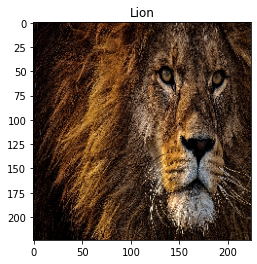

In [20]:
predict_mobilenet('datasets/Transfer Learning Data/Lion.jpg')

### Transfer Learning

In [ ]:
FLOWERS_DATA_URL = tf.keras.utils.get_file('flower_photos',
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

 50143232/228813984 [=====>........................] - ETA: 15:32